In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import plotly.io as pio

### Color pallets ""

In [4]:
fig.update_xaxes(tickangle=45)

NameError: name 'fig' is not defined

In [2]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv("./water_stress_p1.csv")
data.head()

,Species,Plant ID,stress level,Week,Treatment,Replication,Plant_Length (cm),No. of Leaves,leaf _Length (cm)
0,Solanum lycopersicum,Sls1,s,1,1,1,6.8,6,4.5
1,Solanum lycopersicum,Sls2,s,1,1,2,7.0,6,8.0
2,Solanum lycopersicum,Sls3,s,1,1,3,10.5,5,11.5
3,Solanum lycopersicum,Sls4,s,1,1,4,6.0,6,8.0
4,Solanum lycopersicum,Sls5,s,1,1,5,10.0,6,10.5


In [9]:


# Set the variables as the y-axis and the first column as the x-axis
y = data.columns[6:8]
x = data.iloc[:, 1]

# Convert DataFrame to matrix and transpose it
data_matrix = data.iloc[:, 6:8].values.T

# Normalize the data_matrix
scaler = MinMaxScaler()
data_matrix_normalized = scaler.fit_transform(data_matrix)

# Create the heatmap using plotly.express
fig = px.imshow(data_matrix_normalized, y=y, x=x, labels={'y':'Physio-Biochemical Parameters', 'x':'Light-Salt Concentrations with Days'}, color_continuous_scale='magma', aspect='auto')

# Rotate the tick labels on the y-axis
fig.update_yaxes(tickangle=-30)

# Show the heatmap
fig.show()

# Save the heatmap as PNG
# pio.write_image(fig, "heatmap.png", format="png", scale=1, width=400, height=800)

ValueError: The length of the y vector must match the length of the first dimension of the img matrix.

In [3]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv("./water_stress_p1.csv")

# Set the variables as the x-axis and the first column as the y-axis
x = data.columns[6:9]
y = data.iloc[:, 1]

# Convert DataFrame to matrix
data_matrix = data.iloc[:, 6:9].values

# Normalize the data_matrix
scaler = MinMaxScaler()
data_matrix_normalized = scaler.fit_transform(data_matrix)

# Create the heatmap using plotly.express
fig = px.imshow(data_matrix_normalized, x=x, y=y, labels={'x':'Physio-Biochemical Parameters', 'y':'Light-Salt Concentrations with Days'}, color_continuous_scale='magma', aspect='auto')

# Show the heatmap
fig.show()
# fig.write_html('./heatmap.png')


In [ ]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv("./Heatmap 2.csv")

# Set the variables as the x-axis and the first column as the y-axis
x = data.columns[2:19]
y = data.iloc[:, 0]

# Convert DataFrame to matrix
data_matrix = data.iloc[:, 2:19].values

# Normalize the data_matrix
scaler = MinMaxScaler()
data_matrix_normalized = scaler.fit_transform(data_matrix)

# Create the heatmap using plotly.express
fig = px.imshow(data_matrix_normalized, x=x, y=y, labels={'x':'Physio-Biochemical Parameters', 'y':'Light-Salt Concentrations with Days'}, color_continuous_scale='magma', aspect='auto')

# Show the heatmap
fig.show()
# fig.write_html('./heatmap.png')


In [3]:

# Load the CSV file into a pandas DataFrame
data = pd.read_csv("./water_stress_p1.csv")

# Set the variables as the x-axis and the first column as the y-axis
x = data.columns[6:9]
y = data.iloc[:, 1]

# Convert DataFrame to matrix
data_matrix = data.iloc[:, 6:9].values

# Normalize the data_matrix
scaler = MinMaxScaler()
data_matrix_normalized = scaler.fit_transform(data_matrix)

# Create the heatmap using plotly.express
fig = px.imshow(data_matrix_normalized, x=x, y=y, labels={'x':'Physio-Biochemical Parameters', 'y':'Light-Salt Concentrations with Days'}, color_continuous_scale='magma', aspect='auto')

# Show the heatmap
fig.show()


# # Save the heatmap as JPEG
# pio.write_image(fig, "heatmap.jpg", format="jpeg", scale=1, width=400, height=300)

# # Save the heatmap as PNG
# pio.write_image(fig, "heatmap.png", format="png", scale=1, width=600, height=400)


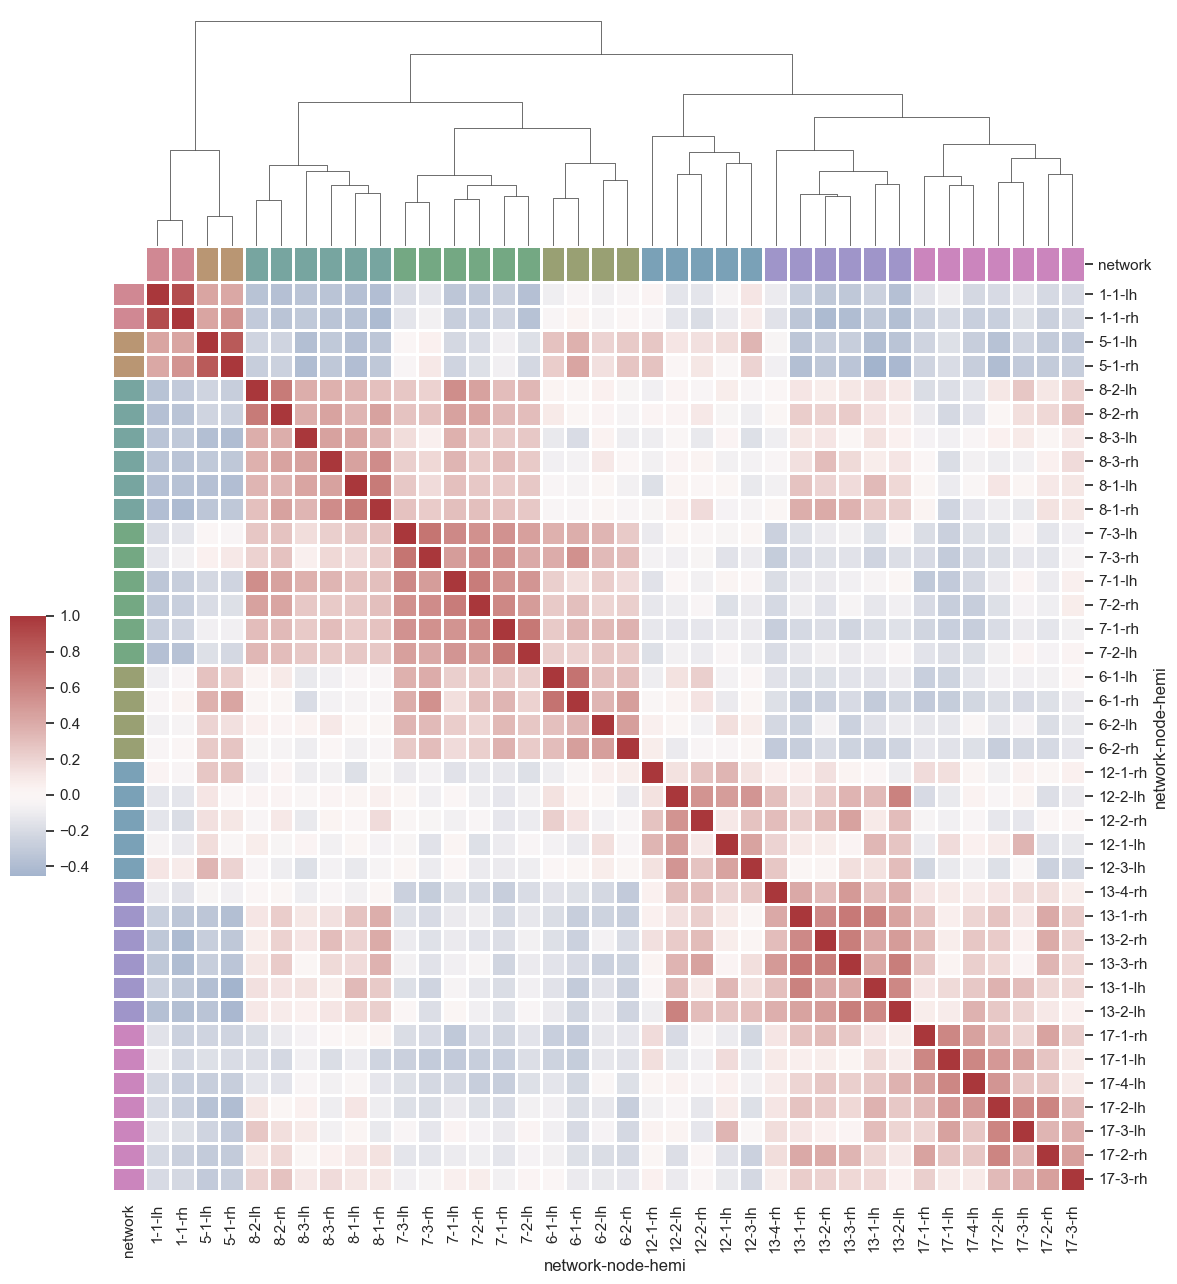

In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

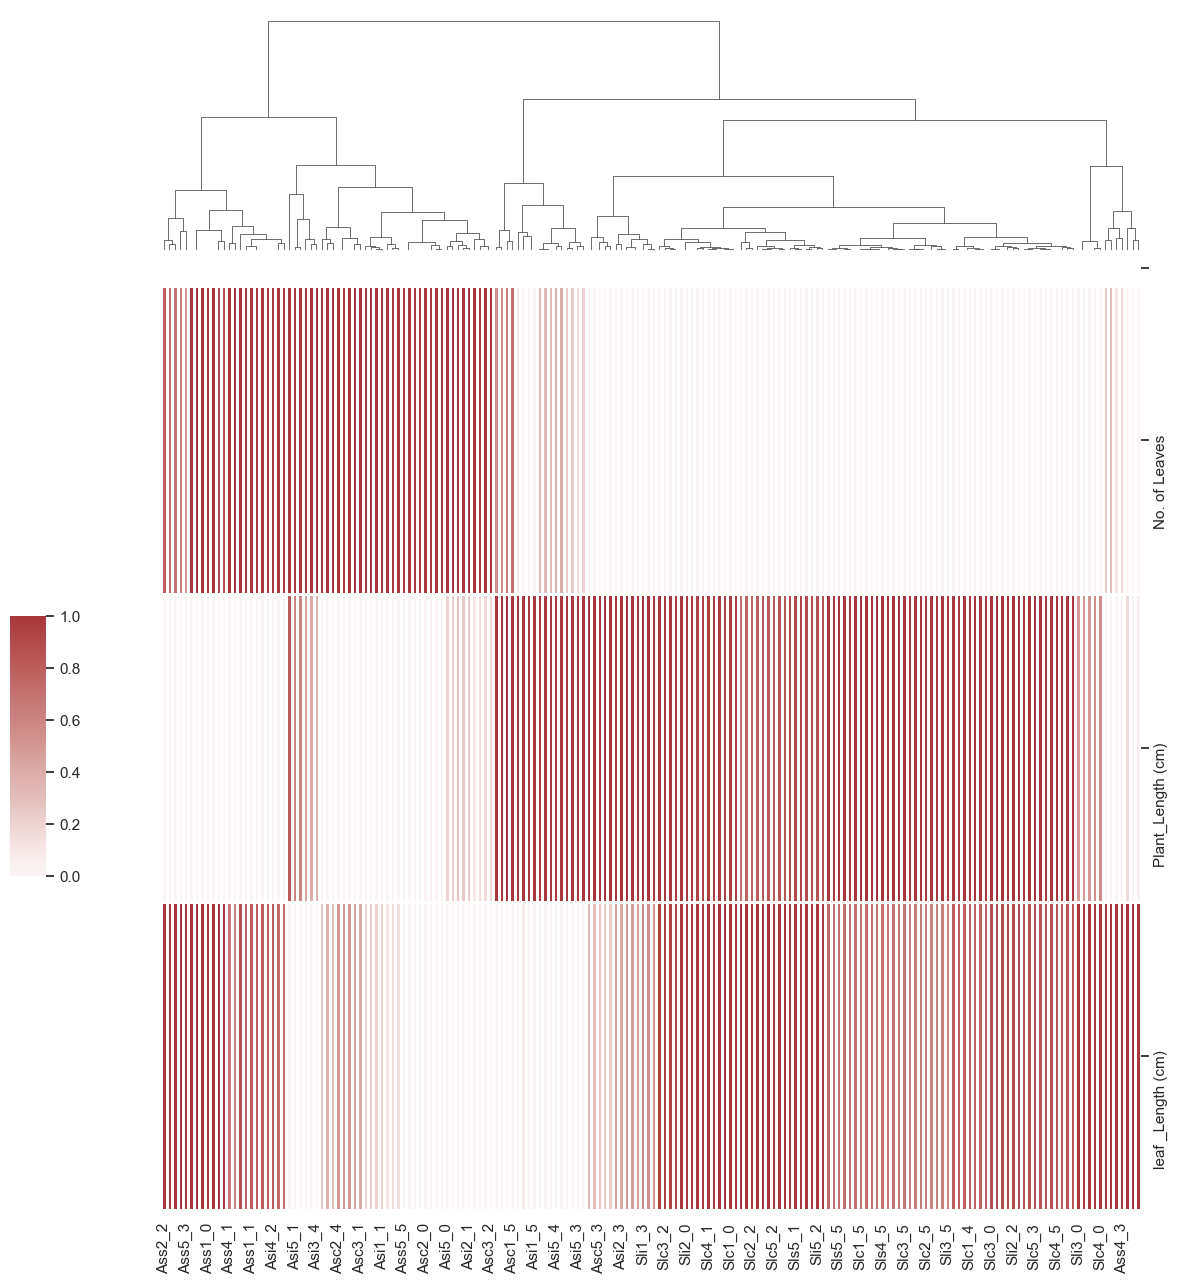

In [13]:
# Load your dataset
df = pd.read_csv("./water_stress_p1.csv")

# Set the variables as the y-axis and the first column as the x-axis
y = df.columns[6:9]
x = df.iloc[:, 1]

# Add sequence number to duplicate column names
x = x + '_' + x.groupby(x).cumcount().astype(str)

# Convert DataFrame to matrix and transpose it
data_matrix = df.iloc[:, 6:9].values.T

# Normalize the data_matrix
scaler = MinMaxScaler()
data_matrix_normalized = scaler.fit_transform(data_matrix)

# Convert the normalized matrix back to DataFrame
df_normalized = pd.DataFrame(data_matrix_normalized, columns=x, index=y)

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, range(6,9)), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df_normalized.columns
network_colors = pd.Series(networks, index=df_normalized.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df_normalized, center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

In [6]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
sns.set_theme()

# Load your dataset
df = pd.read_csv("./Heatmap.csv")

# Set the variables as the y-axis and the first column as the x-axis
y = df.columns[2:65]
x = df.iloc[:, 0]

# Convert DataFrame to matrix and transpose it
data_matrix = df.iloc[:, 2:65].values.T

# Normalize the data_matrix
scaler = MinMaxScaler()
data_matrix_normalized = scaler.fit_transform(data_matrix)

# Convert the normalized matrix back to DataFrame
df_normalized = pd.DataFrame(data_matrix_normalized, columns=x, index=y)

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, range(2,65)), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df_normalized.columns
network_colors = pd.Series(networks, index=df_normalized.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df_normalized, center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

ValueError: cannot reindex on an axis with duplicate labels

<Figure size 1200x1300 with 0 Axes>

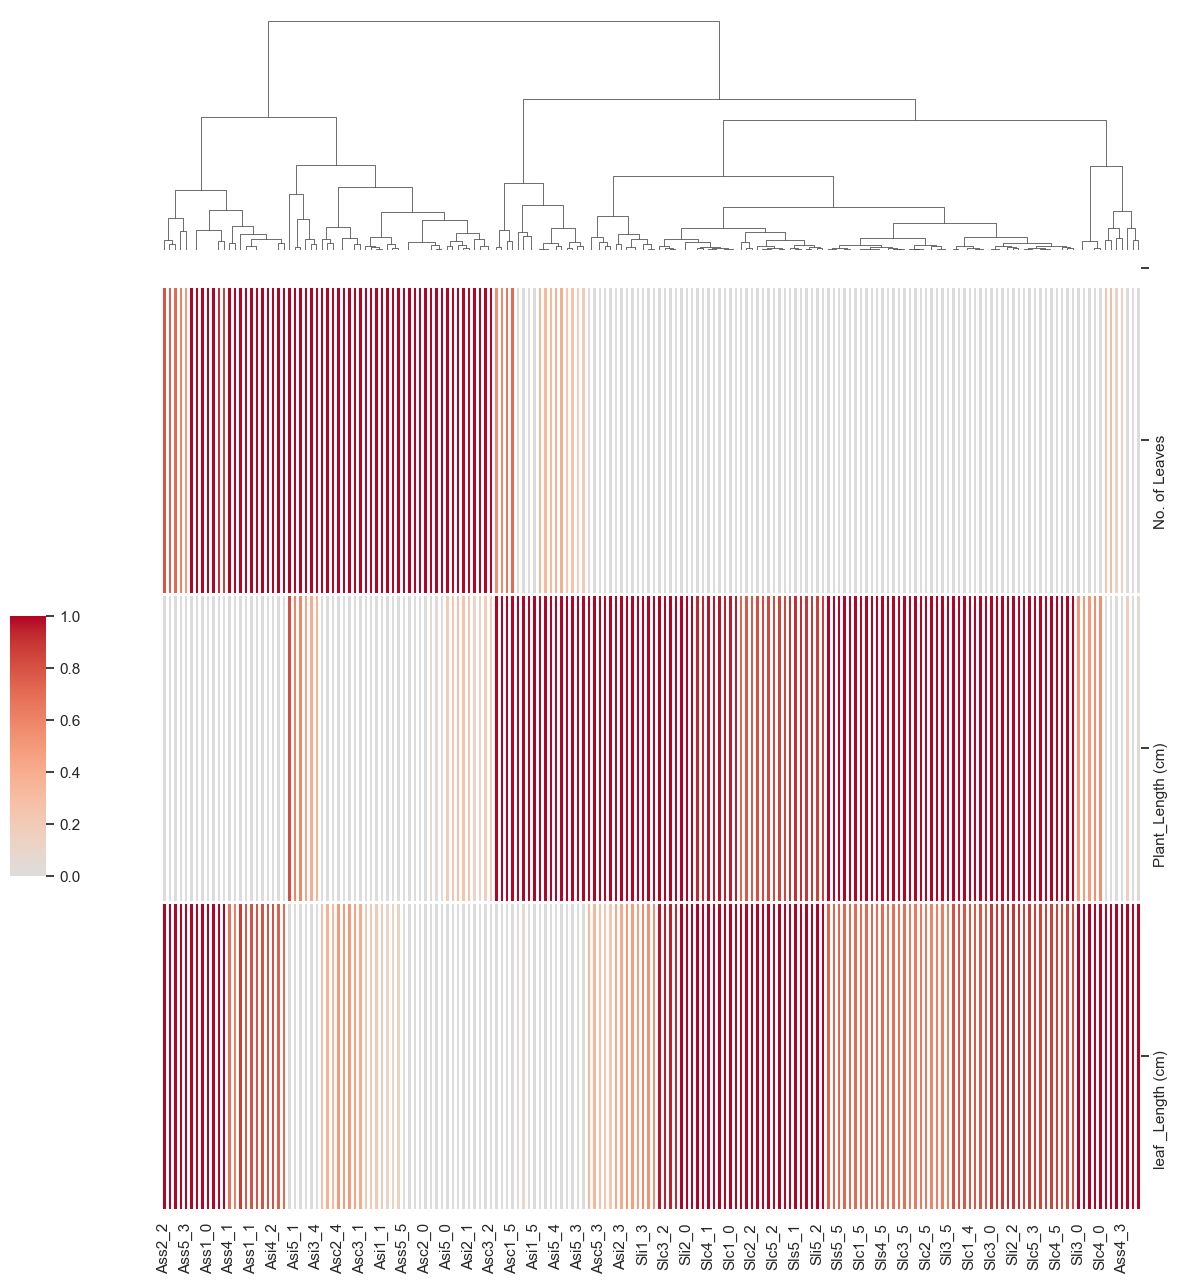

In [8]:
# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=1)  # Increase saturation to 1
network_lut = dict(zip(map(str, range(2,65)), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df_normalized.columns
network_colors = pd.Series(networks, index=df_normalized.columns).map(network_lut)

# Draw the full plot with the "coolwarm" palette
g = sns.clustermap(df_normalized, center=0, cmap="coolwarm",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

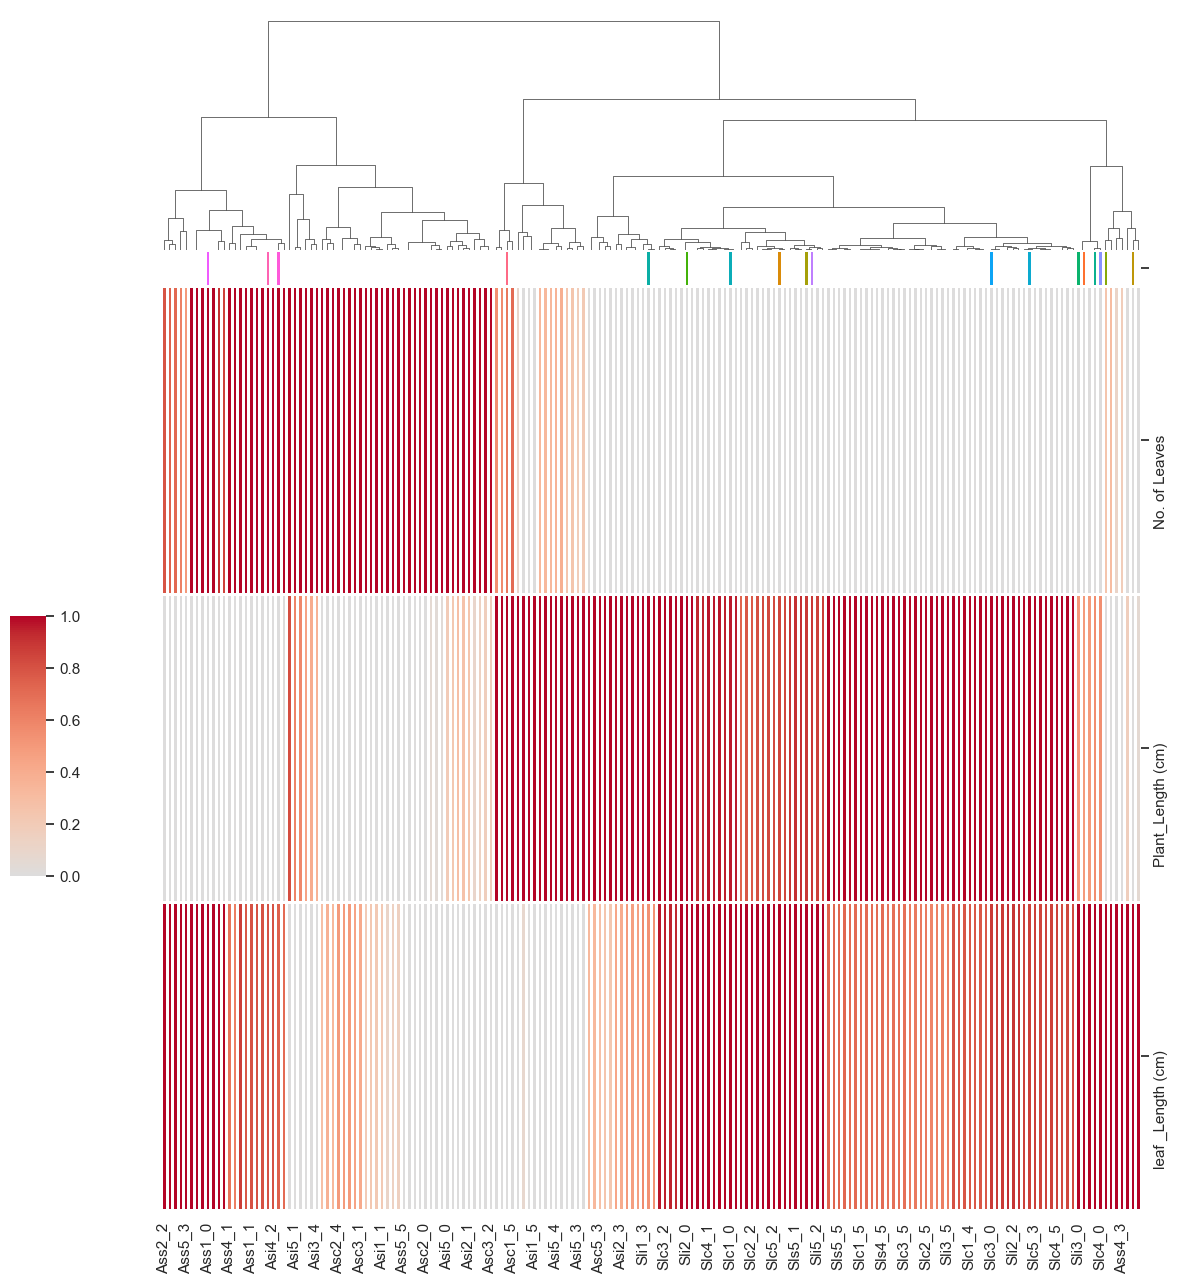

In [9]:
# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(18, s=1)  # Create a palette with 18 colors
network_lut = dict(zip(map(str, df_normalized.columns), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df_normalized.columns
network_colors = pd.Series(networks, index=df_normalized.columns).map(network_lut)

# Draw the full plot with the "coolwarm" palette
g = sns.clustermap(df_normalized, center=0, cmap="coolwarm",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

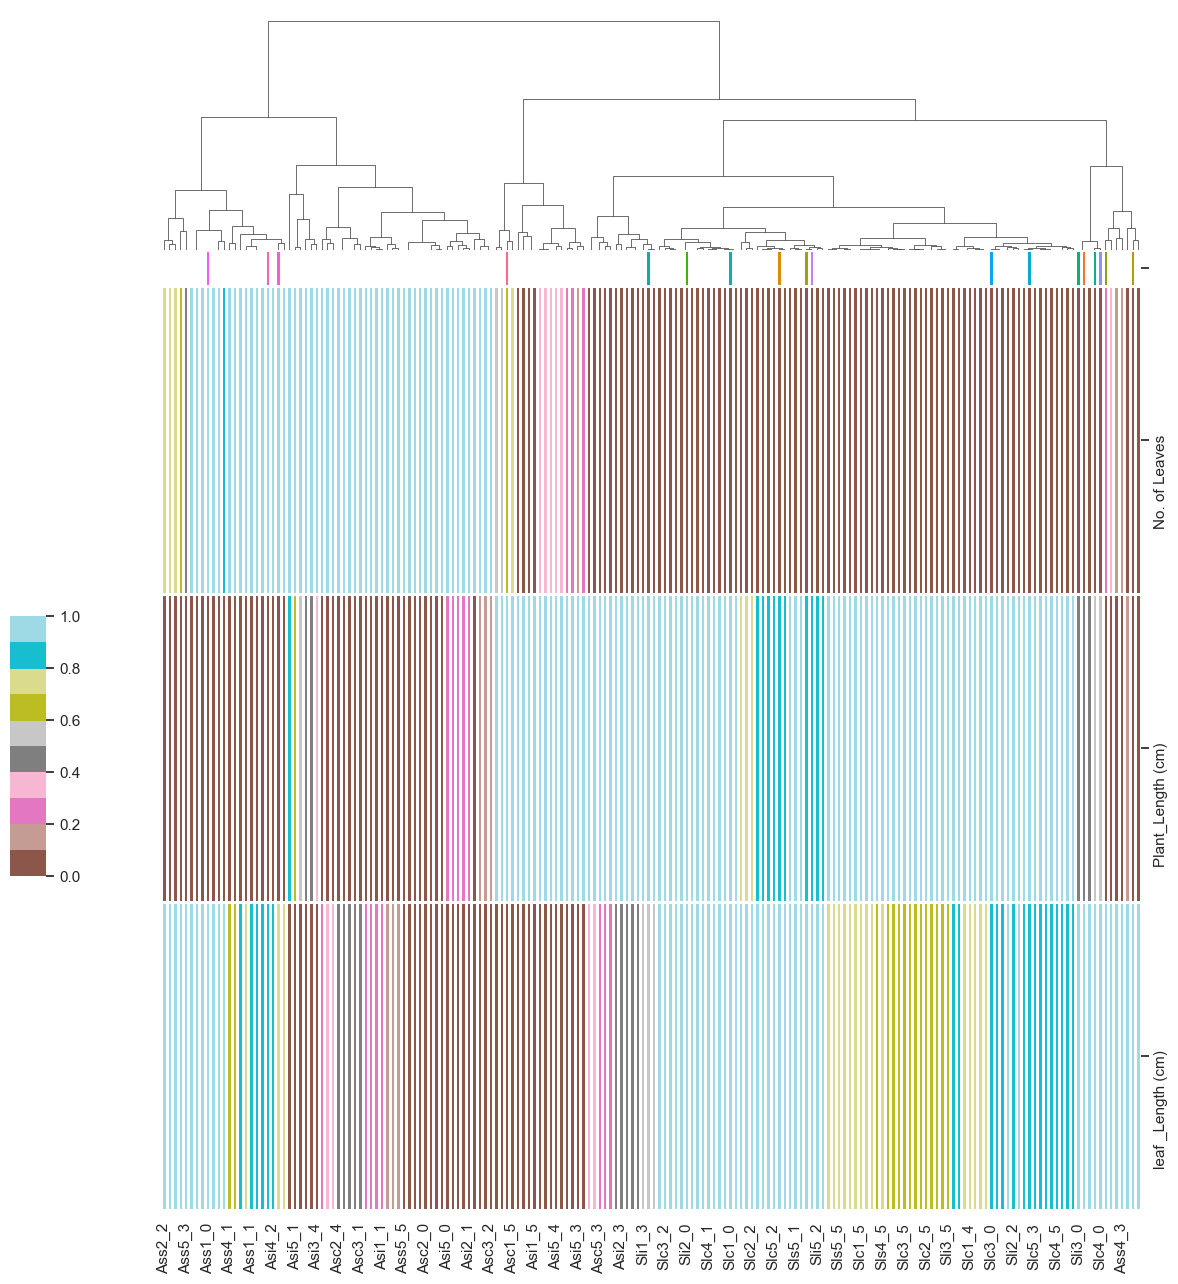

In [10]:
import matplotlib.pyplot as plt

# Create a colormap with multiple colors
cmap = plt.get_cmap("tab20")

# Draw the full plot with the new colormap
g = sns.clustermap(df_normalized, center=0, cmap=cmap,
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

<Axes: xlabel='D07-D-S0'>

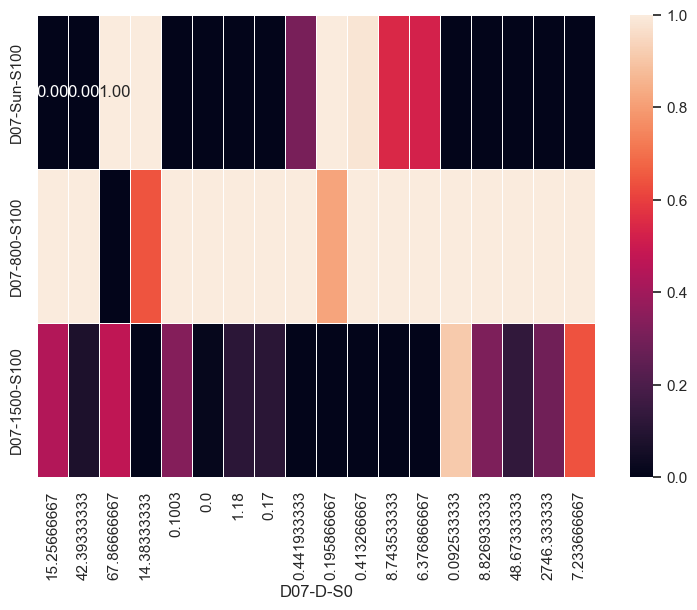

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

sns.set_theme()

# Load your dataset
df = pd.read_csv("./Heatmap.csv")

# Set the variables as the y-axis and the first column as the x-axis
y = df.columns[6:9]
x = df.iloc[:, 1]

# Convert DataFrame to matrix and transpose it
data_matrix = df.iloc[:, 6:9].values.T

# Normalize the data_matrix
scaler = MinMaxScaler()
data_matrix_normalized = scaler.fit_transform(data_matrix)

# Convert the normalized matrix back to DataFrame
df_normalized = pd.DataFrame(data_matrix_normalized, columns=x, index=y)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_normalized, annot=True, fmt=".2f", linewidths=.5, ax=ax)

<Axes: >

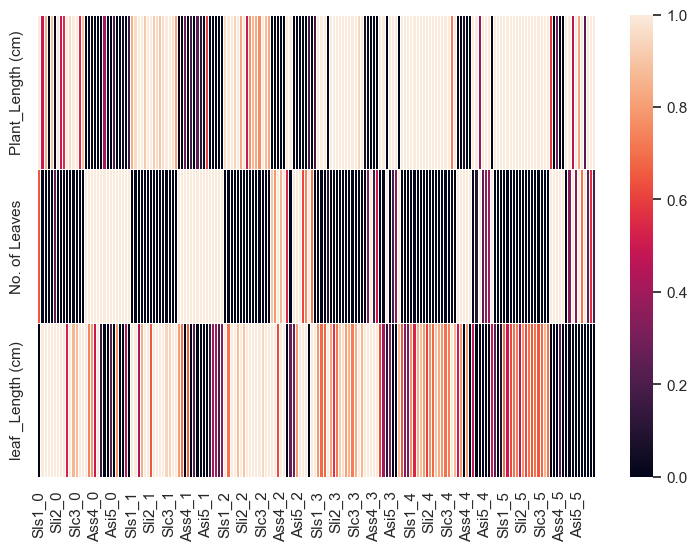

In [14]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_normalized, annot=False, fmt=".2f", linewidths=.5, ax=ax, annot_kws={"size": 8})

In [15]:
# Draw a heatmap with larger tiles
f, ax = plt.subplots(figsize=(24, 18))  # Increase the size of the figure
sns.heatmap(df_normalized, annot=False, fmt=".2f", linewidths=.5, ax=ax, annot_kws={"size": 8})

# Save the figure with a resolution of 600 dpi
# plt.savefig("heatmap.png", dpi=600)

KeyboardInterrupt: 

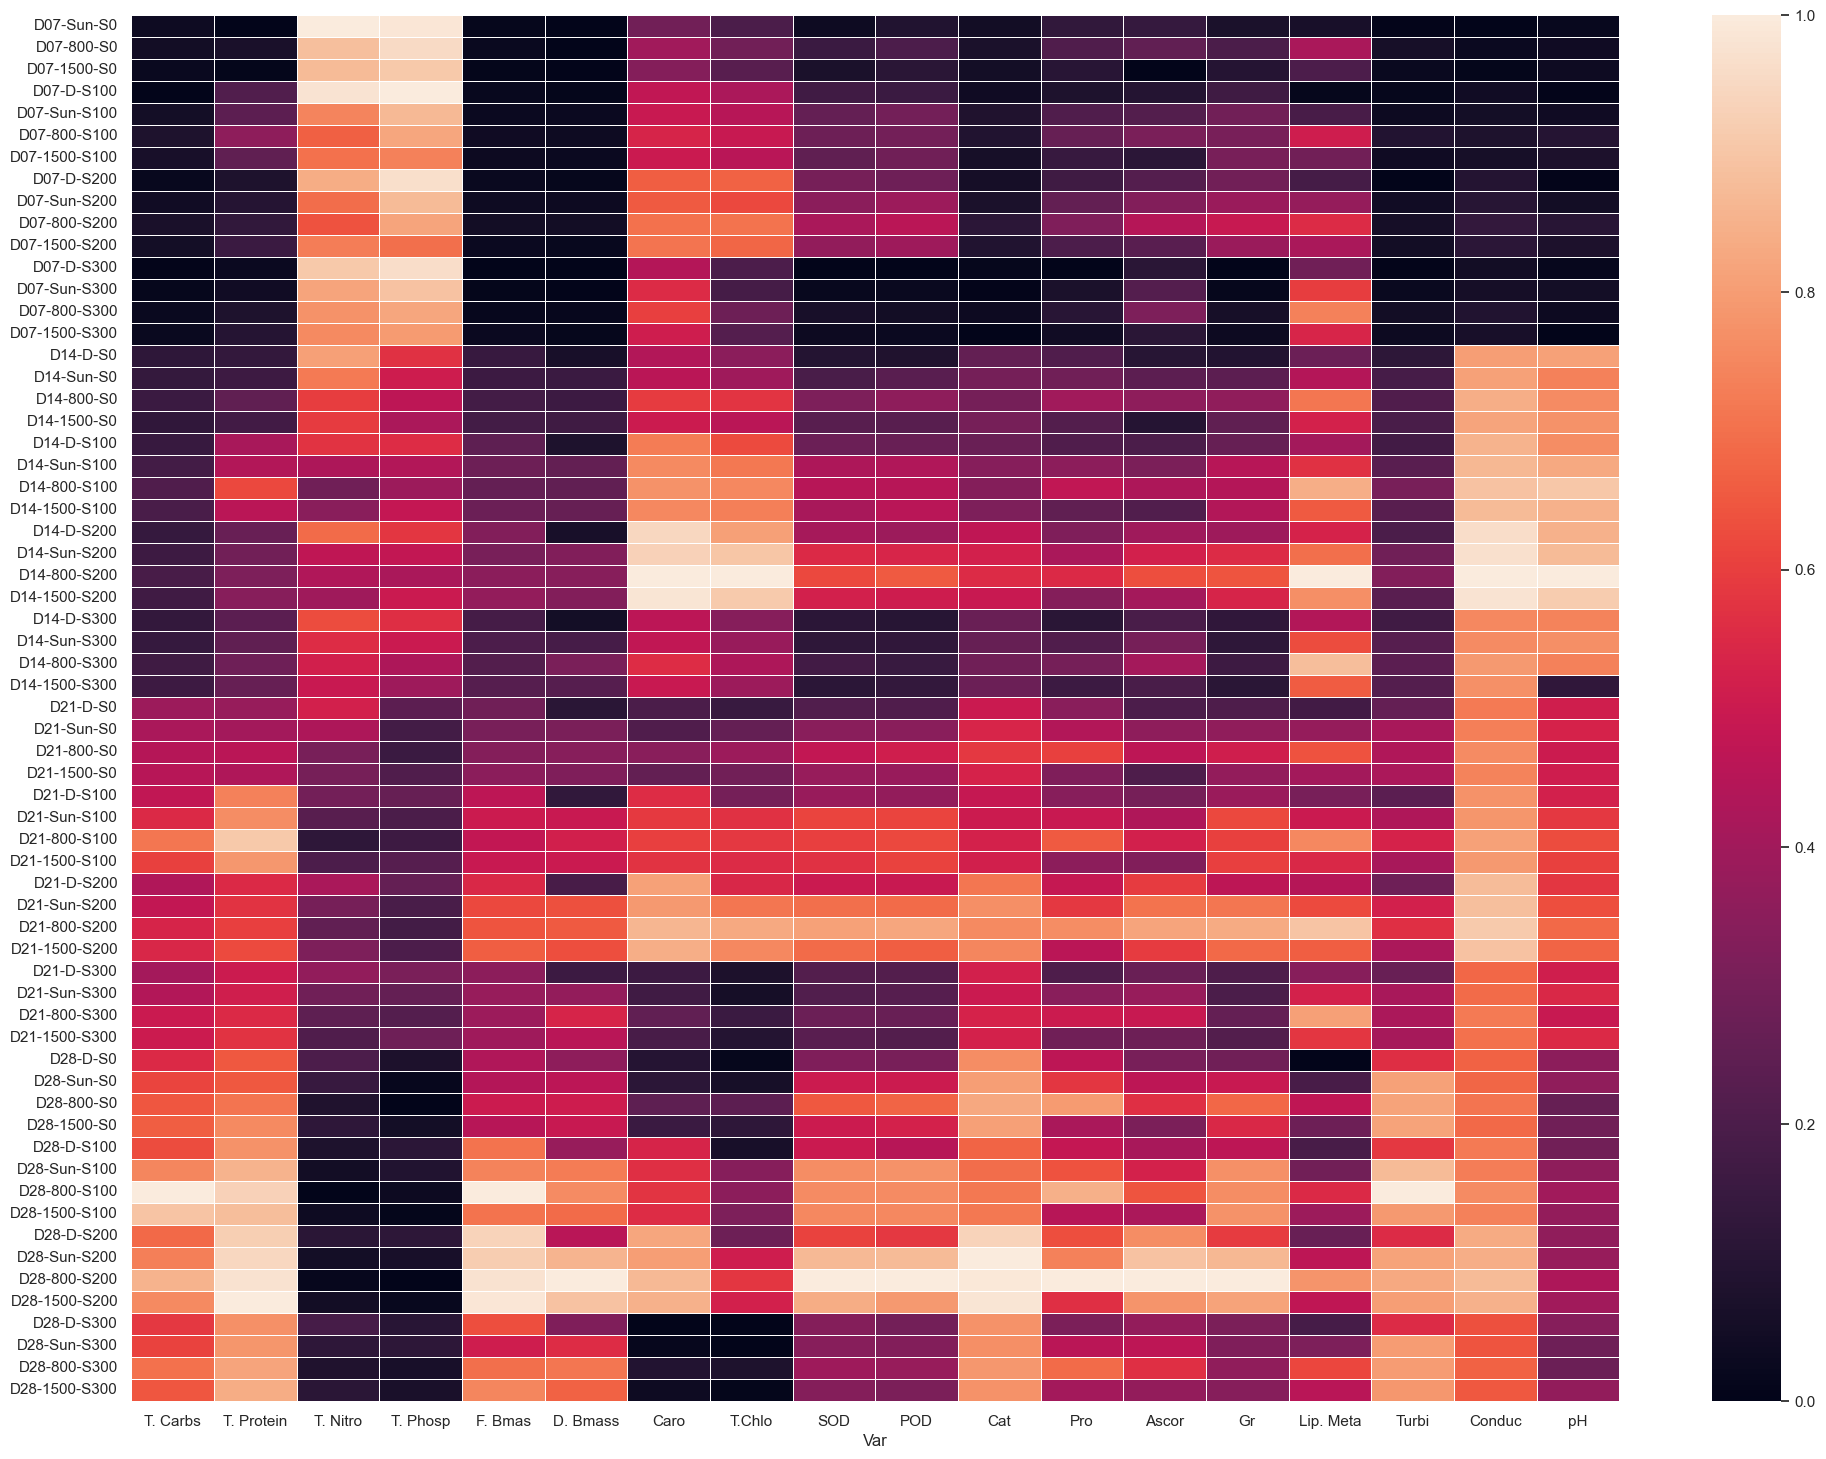

In [13]:
# Draw a heatmap with a vertical colorbar
f, ax = plt.subplots(figsize=(24, 18))  # Increase the size of the figure
sns.heatmap(df_normalized, annot=False, fmt=".2f", linewidths=.5, ax=ax, cbar_kws={'orientation': 'vertical'})

# Save the figure with a resolution of 600 dpi
plt.savefig("heatmap.png", dpi=600)

<Axes: xlabel='cylinders', ylabel='acceleration'>

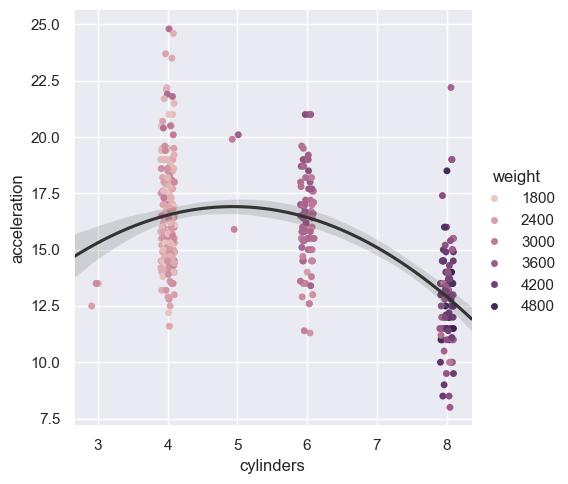

In [1]:
import seaborn as sns
sns.set_theme()

mpg = sns.load_dataset("mpg")
sns.catplot(
    data=mpg, x="cylinders", y="acceleration", hue="weight",
    native_scale=True, zorder=1
)
sns.regplot(
    data=mpg, x="cylinders", y="acceleration",
    scatter=False, truncate=False, order=2, color=".2",
)

In [8]:
df = pd.read_csv('./Heatmap 2.csv')

In [9]:
df.columns

Index(['Var', 'T. Carbs', 'T. Protein', 'T. Nitro', 'T. Phosp', 'F. Bmas',
       'D. Bmass', 'Caro', 'T.Chlo', 'SOD', 'POD', 'Cat', 'Pro', 'Ascor', 'Gr',
       'Lip. Meta', 'Turbi', 'Conduc', 'pH'],
      dtype='object')

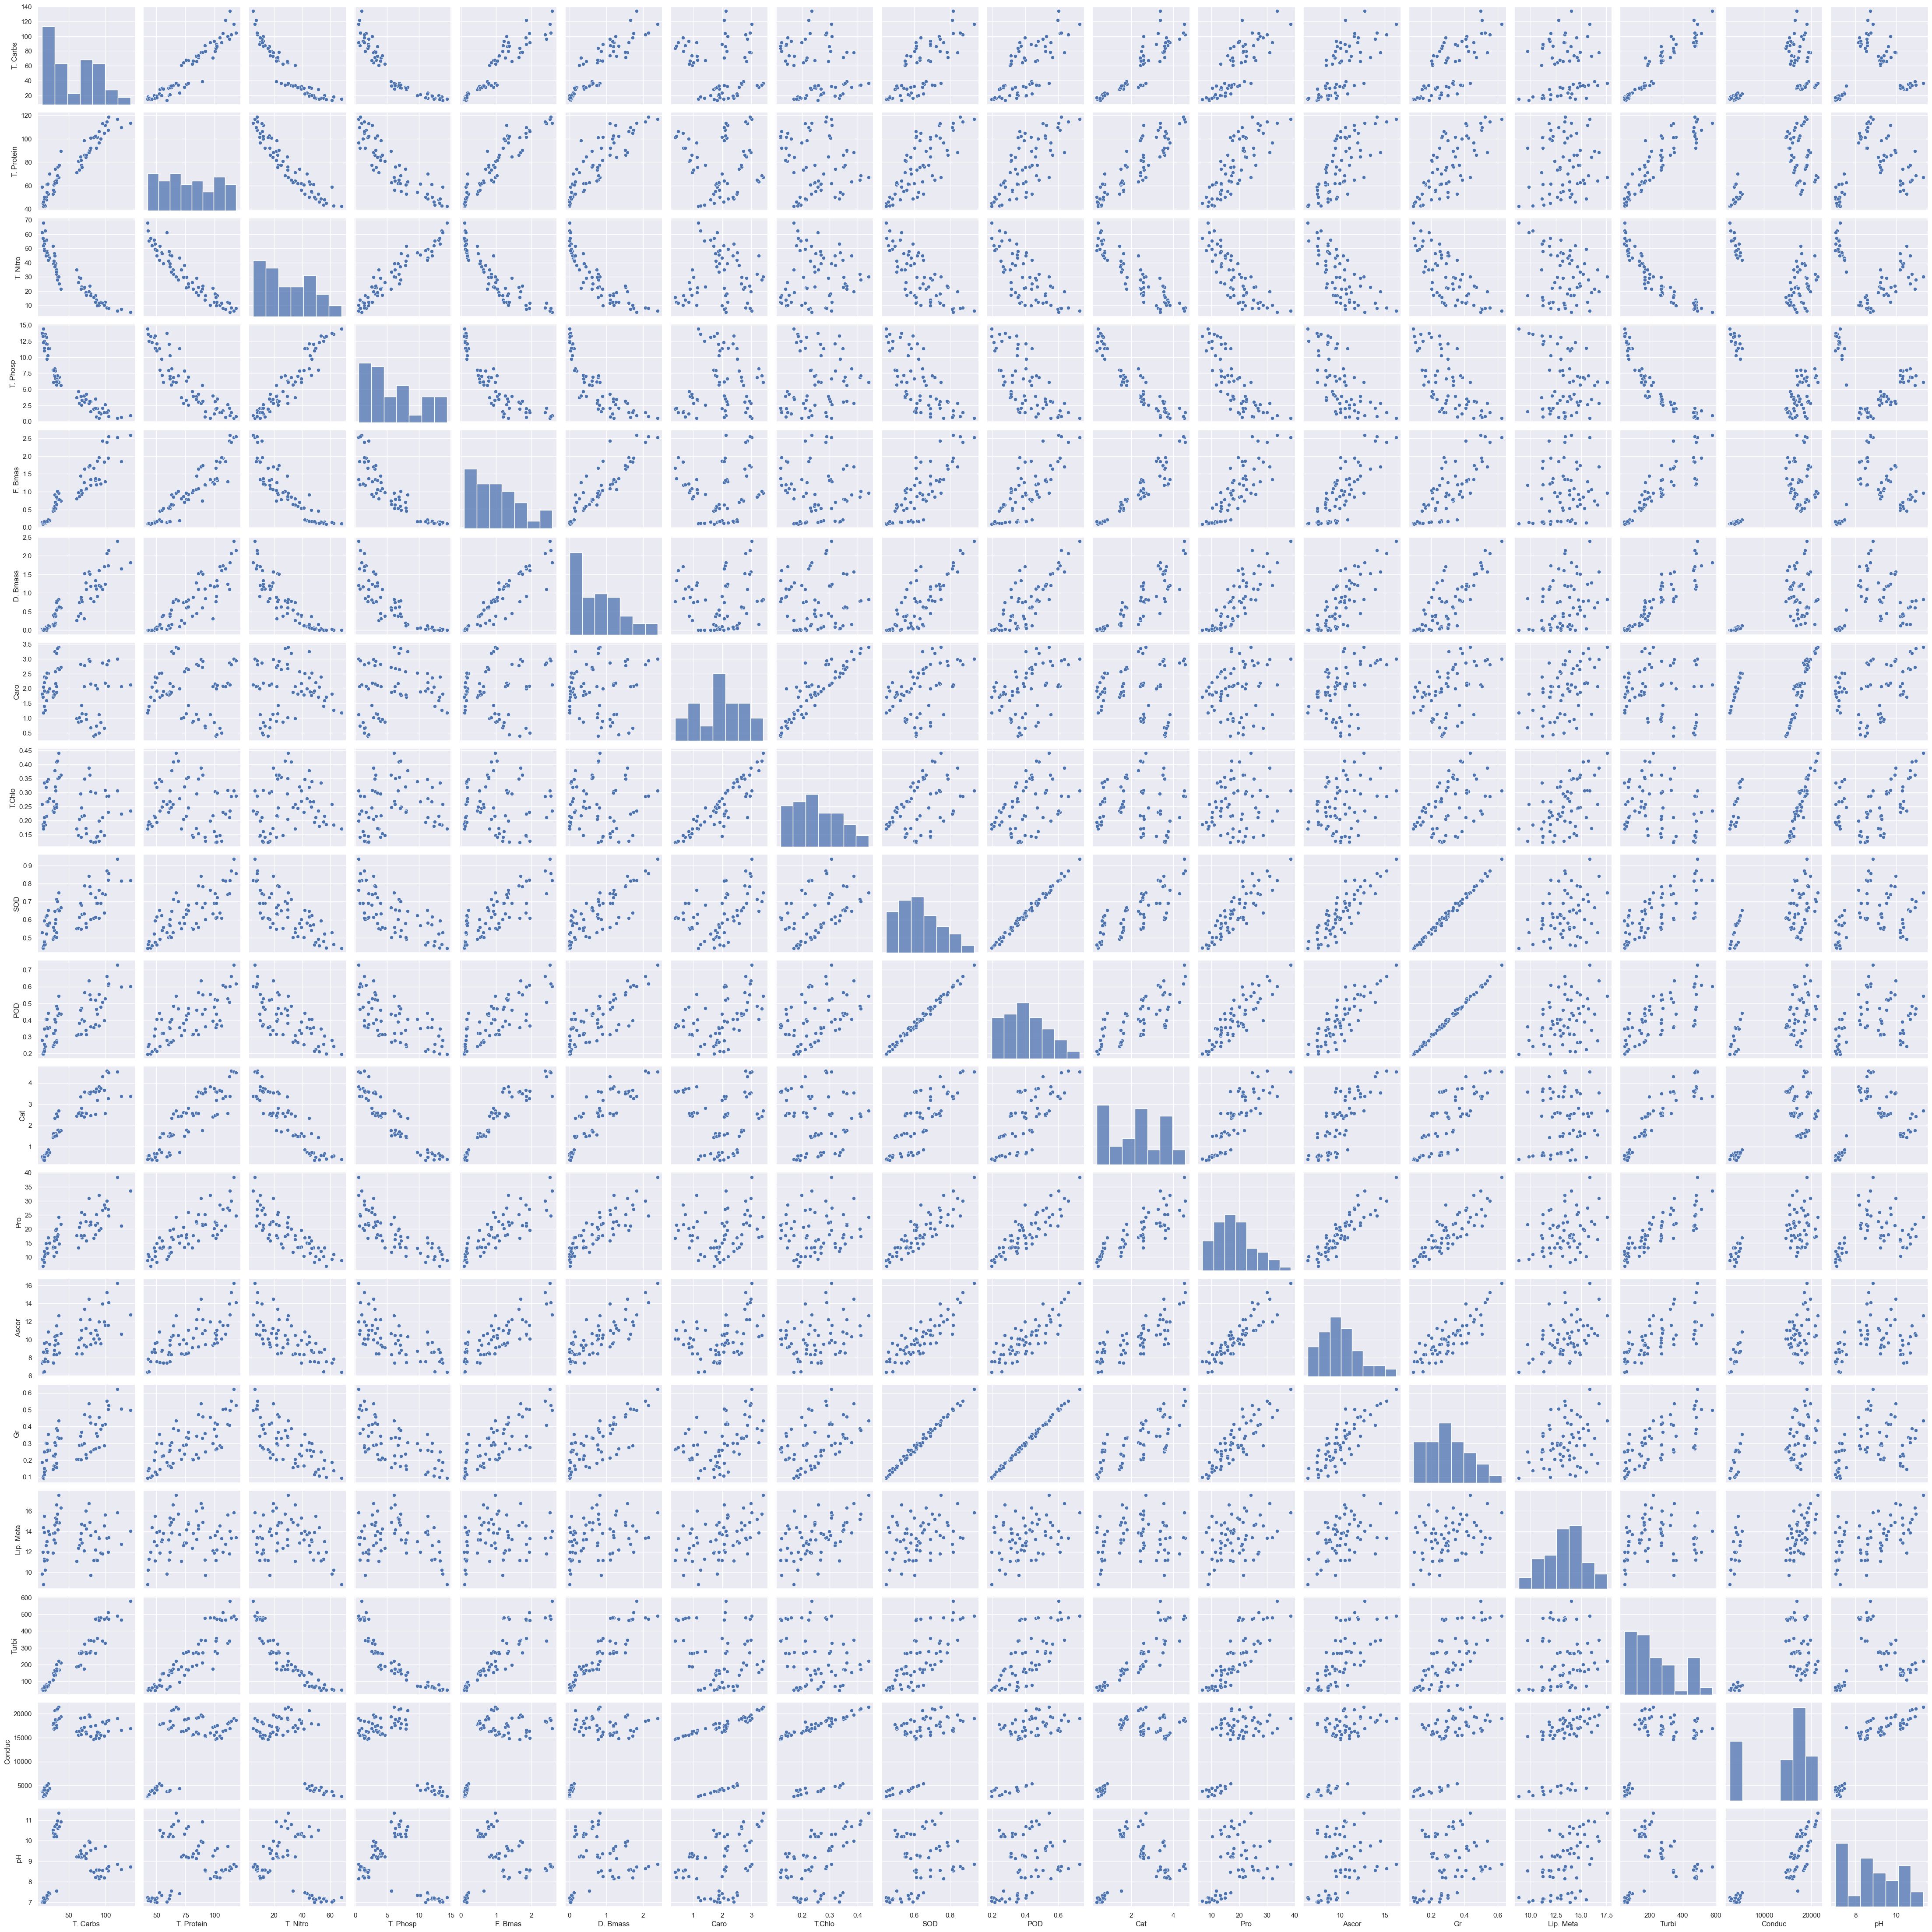

In [11]:
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
df = pd.read_csv('./Heatmap 2.csv')

# Plotting multiple subplots for all pairs of variables
sns.pairplot(df)